# Linear regression

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
np.random.seed(1)

def true_target(x):
  return 2*x + 2

def observed_target(x):
  """Underlying data with Gaussian noise added"""
  normal_noise = np.random.normal() * 3
  return true_target(x) + normal_noise


N = 50

# Features, X is [1,50]
# X = np.arange(N).reshape(N, 1)
X = np.random.rand(N).reshape(N, 1) * 10

# Observed targets
y = np.array([observed_target(x) for x in X]).reshape(N, 1)

# Append 1 for intercept term later
X = np.hstack([np.ones((N, 1)), X])

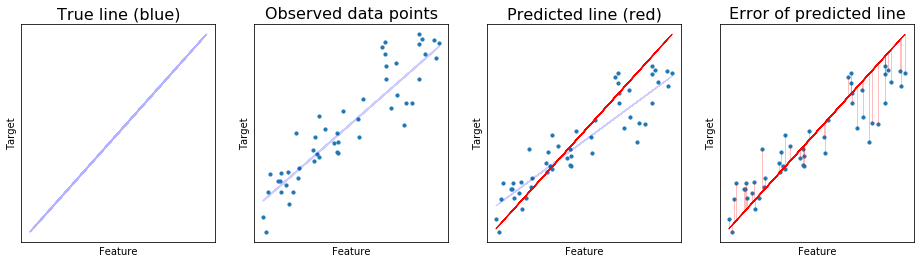

In [3]:
fig = plt.figure(figsize=(16,4))

ax = fig.add_subplot(141)

# For plotting
features = X[:,1:] # exclude the intercept for plotting
target = y
true_targets = true_target(X[:,1:])

# plt.scatter(features, target, s=10, label='Observed data points')
ax.plot(features, true_targets, c='blue', alpha=0.3)

ax.set_xlabel('Feature')
ax.set_ylabel('Target')
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('True line (blue)', fontsize=16)

ax2 = plt.subplot(142)
ax2.scatter(features, target, s=10)
ax2.plot(features, true_targets, c='blue', label='True line', alpha=0.2)

ax2.set_xlabel('Feature')
ax2.set_ylabel('Target')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Observed data points', fontsize=16)


ax3 = plt.subplot(143)
predicted_w = [-1.5, 3]
ax3.scatter(features, target, s=10)
ax3.plot(features, true_targets, c='blue', linewidth=1, alpha=0.2)
ax3.plot(features, X @ predicted_w, c='red', linewidth=1, alpha=1)

ax3.set_xlabel('Feature')
ax3.set_ylabel('Target')
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_title('Predicted line (red)', fontsize=16)



ax4 = plt.subplot(144)
ax4.scatter(features, target, s=10)
ax4.plot(features, X @ predicted_w, c='red', linewidth=1, alpha=1)

# For all x,y
for x_, y_ in zip(X, y):
  predicted_y = x_ @ predicted_w
  ax4.plot([x_[1], x_[1]], [y_, predicted_y], linewidth=0.5, c='red', alpha=0.5)

ax4.set_xlabel('Feature')
ax4.set_ylabel('Target')
ax4.set_xticks([])
ax4.set_yticks([])
ax4.set_title('Error of predicted line', fontsize=16)

plt.show()

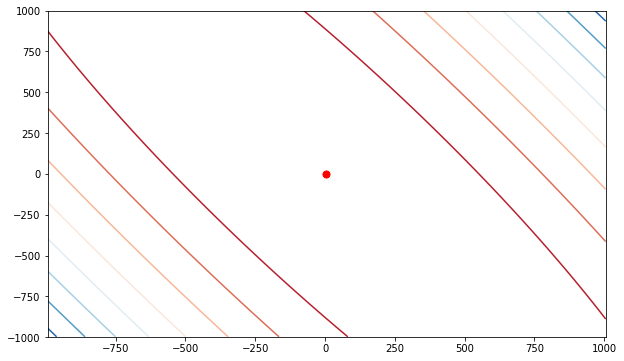

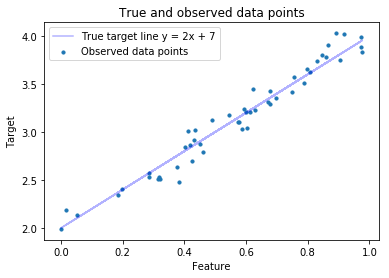

In [7]:
def visualize_contours():
  
  N = 50

  # Features, X is [1,50]
  # X = np.arange(N).reshape(N, 1)
  X = np.random.rand(N).reshape(N, 1)
  
  def observed_target(x):
    """Underlying data with Gaussian noise added"""
    normal_noise = np.random.normal() * 0.1
    return true_target(x) + normal_noise

  # Observed targets
  y = np.array([observed_target(x) for x in X]).reshape(N, 1)
  
    # Append 1 for intercept term later
  X = np.hstack([np.ones((N, 1)), X])
  
  lr = LinearRegression(fit_intercept=False)
  lr.fit(X,y)
  w = lr.coef_[0]

  spanning_radius = 1000
  step = 2
  w0range = np.arange(7-spanning_radius, 7+spanning_radius, step)
  w1range = np.arange(2-spanning_radius, 2+spanning_radius, step)
  w0grid, w1grid = np.meshgrid(w0range, w1range)
  
  range_len = len(w0range)
  
  # Make [w0, w1] in (2, 14400) shape
  all_w0w1_values = np.hstack([w0grid.flatten()[:,None], w1grid.flatten()[:,None]]).T

  # Compute all losses, reshape back to grid format
  all_losses = (np.linalg.norm(y - (X @ all_w0w1_values), axis=0, ord=2) ** 2).reshape((range_len, range_len))

  fig = plt.figure(figsize=(10,6))
  ax = fig.gca()
  ax.contour(w0grid, w1grid, all_losses, levels=10, alpha=1, cmap='RdBu')
  ax.scatter(w[0], w[1], c='red', s=50, label="Minimum point (5.9,2.2)")
  plt.show()
  
  # For plotting
  features = X[:,1:] # exclude the intercept for plotting
  target = y
  true_targets = true_target(X[:,1:])

  plt.scatter(features, target, s=10, label='Observed data points')
  plt.plot(features, true_targets, c='blue', label='True target line y = 2x + 7', alpha=0.3)

  plt.xlabel('Feature')
  plt.ylabel('Target')
  plt.legend(loc='best')
  plt.title('True and observed data points')
  plt.show()
  
visualize_contours()
